In [4]:
# Load in our libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [2]:
df = pd.read_excel('output.xlsx', sheet_name='Sheet1')

h11=['Status of existing checking account', 'Duration in month',
       'Credit history', 'Savings account/bonds',
       'Installment rate in percentage of disposable income']



h12=['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans ', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Receive_NotReceiveCredit']


df['Receive_NotReceiveCredit']=df['Receive_NotReceiveCredit'].replace(to_replace = 2, value =0) 

train, test = train_test_split(df, test_size=0.3)


train_x = train[h12]
X_scaled = preprocessing.scale(train_x)
train_y = train['Receive_NotReceiveCredit'].to_frame()

test_x = test[h12]
X_scaled2 = preprocessing.scale(test_x)
test_y = test['Receive_NotReceiveCredit'].to_frame()

/home/sophia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
/home/sophia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


In [31]:
#dataset = pd.read_csv("estadistical.csv")

#x = dataset.drop("Receive/ Not receive credit ",axis=1)
#y = dataset["Receive/ Not receive credit "]

#cat_mask = x.dtypes==object

#cat_cols = x.columns[cat_mask].tolist()

#le = preprocessing.LabelEncoder()

#x[cat_cols] = x[cat_cols].apply(lambda col: le.fit_transform(col))

In [32]:
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, stratify = y)

In [19]:
model = KNeighborsClassifier(n_neighbors=3)

# fit the model with the training data
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 

/home/sophia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Normalized confusion matrix
[[0.29 0.71]
 [0.25 0.75]]


/home/sophia/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


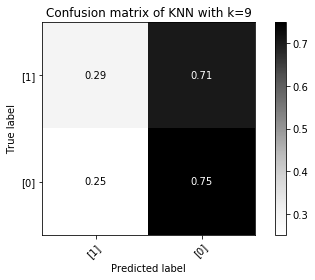

In [21]:
plot_confusion_matrix(test_y.values, predict_test, classes= train_y.values, normalize=True,
                      title='Confusion matrix of KNN with k=9')

plt.show()

              precision    recall  f1-score   support

           0       0.32      0.29      0.30        85
           1       0.73      0.75      0.74       215

   micro avg       0.62      0.62      0.62       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.61      0.62      0.62       300



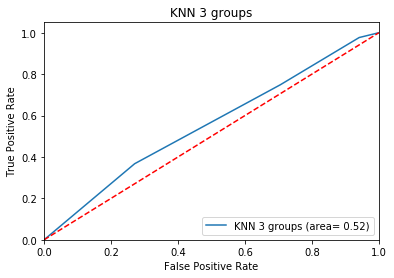

In [23]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predict_test))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, model.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN 3 groups (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN 3 groups')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

